In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(pd.__version__)
print(np.__version__)

2.2.2
2.0.2


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
fmnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
training_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
training_labels,test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48  88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221 142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157  68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61  93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76  97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80  96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81  95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85  97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81 

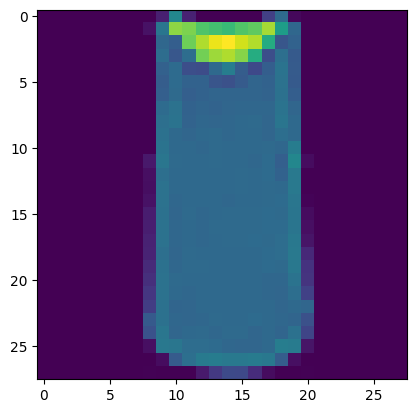

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 2

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])
plt.show()

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Build the classification model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),           # Flattens input (e.g. 28x28 to 784)
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback function
early_stopping = EarlyStopping(patience=5)
model.fit(training_images, training_labels,verbose=1,validation_split=0.2, epochs=100,callbacks=[early_stopping])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9369 - loss: 0.1705 - val_accuracy: 0.8948 - val_loss: 0.3486
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9388 - loss: 0.1606 - val_accuracy: 0.8928 - val_loss: 0.3491
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9389 - loss: 0.1602 - val_accuracy: 0.8951 - val_loss: 0.3474
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9450 - loss: 0.1467 - val_accuracy: 0.8932 - val_loss: 0.3498
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1481 - val_accuracy: 0.8917 - val_loss: 0.3621
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9461 - loss: 0.1461 - val_accuracy: 0.8917 - val_loss: 0.3672
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9461 - loss: 0.1452 - val_accuracy: 0.8865 - val_loss: 0.3783
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9475 - loss: 0

In [ ]:
# Evaluate the model on unseen data
loss,accuracy= model.evaluate(test_images, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8846 - loss: 0.3704
Loss: 0.3724793791770935
Accuracy: 0.8848000168800354


Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_images)
print('Probability of Each Class')
print(classifications[2])
print()
print('Rounded Classification')
rounded_classification = np.round(classifications,2)
print(rounded_classification[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Probability of Each Class
[5.2014636e-17 1.0000000e+00 7.9307983e-25 1.2149571e-17 2.6545654e-21 1.6036766e-35 2.0789397e-21 5.3290119e-40 4.0643383e-25 4.4049089e-37]

Rounded Classification
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(test_labels[2])

1


E1Q1: What does this list represent?

Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

E2Q1: Increase to 1024 Neurons -- What's the impact?
Training takes longer, but is more accurate
Training takes longer, but no impact on accuracy
Training takes the same time, but is more accurate